Step 1 — Imports

In [3]:
import os
from pathlib import Path
import re
import textwrap
import json

import numpy as np
import pandas as pd

import seaborn as sns

# display nicer plots in notebook
%matplotlib inline
sns.set(style="whitegrid")

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)


pandas: 2.3.2
numpy: 2.3.3
seaborn: 0.13.2


In [13]:
# %% cell: find_files
DATA_DIR = Path("/Users/zahra/Desktop/Hr DataGeneration/data")
print("Checking data directory:", DATA_DIR.resolve())

expected_files = [
    "people.csv",
    "person_skills.csv",
    "skills.csv",
    "experience.csv",
    "education.csv",
    "abilities.csv",]

found = {f: (DATA_DIR / f).exists() for f in expected_files}
print("Data directory:", DATA_DIR.resolve())
print("Found files:")
for f, exists in found.items():
    print(f" - {f}: {'FOUND' if exists else 'missing'}")

# Quick listing of any CSVs in the folder
print("\nOther CSVs in directory:")
for p in sorted(DATA_DIR.glob("*.csv")):
    print(" -", p.name)


Checking data directory: /Users/zahra/Desktop/Hr DataGeneration/data
Data directory: /Users/zahra/Desktop/Hr DataGeneration/data
Found files:
 - people.csv: FOUND
 - person_skills.csv: FOUND
 - skills.csv: FOUND
 - experience.csv: FOUND
 - education.csv: FOUND
 - abilities.csv: FOUND

Other CSVs in directory:
 - abilities.csv
 - education.csv
 - experience.csv
 - people.csv
 - person_skills.csv
 - skills.csv


In [15]:
# %% cell: load_data_updated
import pandas as pd

# Map of dataset names to CSV files found
csv_mapping = {
    "people": "people.csv",
    "person_skills": "person_skills.csv",
    "skills": "skills.csv",
    "experience": "experience.csv",
    "education": "education.csv",
    "abilities": "abilities.csv"}

# Load DataFrames
datasets = {}
for name, filename in csv_mapping.items():
    if filename and (DATA_DIR / filename).exists():
        df = pd.read_csv(DATA_DIR / filename, dtype=str, keep_default_na=False, na_values=["", "NA", "NaN"])
        datasets[name] = df
        print(f"{name}: {df.shape[0]} rows, {df.shape[1]} columns")
        display(df.head(3))
    else:
        datasets[name] = pd.DataFrame()
        print(f"{name}: MISSING or empty")

# Assign each DataFrame to variable for convenience
people = datasets["people"]
person_skills = datasets["person_skills"]
skills = datasets["skills"]
experience = datasets["experience"]
education = datasets["education"]
abilities = datasets["abilities"]

print("Loaded datasets summary:")
for name, df in datasets.items():
    print(f" - {name}: {len(df)} rows, columns = {list(df.columns)}")


people: 54933 rows, 5 columns


,person_id,name,email,phone,linkedin
0,1,Database Administrator,NaN,NaN,NaN
1,2,Database Administrator,NaN,NaN,NaN
2,3,Oracle Database Administrator,NaN,NaN,NaN


person_skills: 2483376 rows, 2 columns


,person_id,skill
0,1,Database administration
1,1,Database
2,1,Ms sql server


skills: 226760 rows, 1 columns


,skill
0,Mongo DB-3.2
1,JNDI LDAP
2,Stored Procedures


experience: 265404 rows, 6 columns


,person_id,title,firm,start_date,end_date,location
0,1,Database Administrator,Family Private Care LLC,04/2017,Present,"Roswell, GA"
1,1,Database Administrator,Incomm,01/2014,02/2017,"Alpharetta, GA"
2,2,Database Administrator,Intercontinental Registry,12/2008,08/2011,"Lagos, GU"


education: 75999 rows, 5 columns


,person_id,institution,program,start_date,location
0,1,Lead City University,Bachelor of Science,07/2013,NaN
1,2,lagos state university,bsc in computer science,NaN,"Lagos, GU"
2,3,"JNTU - Kakinada, Andhra Pradesh",Master of Computer Applications in Science and...,2013,"Kakinada, Andhra Pradesh"


abilities: 1219473 rows, 2 columns


,person_id,ability
0,1,Installation and Building Server
1,1,Running Backups
2,1,Recovering and Restoring Models


Loaded datasets summary:
 - people: 54933 rows, columns = ['person_id', 'name', 'email', 'phone', 'linkedin']
 - person_skills: 2483376 rows, columns = ['person_id', 'skill']
 - skills: 226760 rows, columns = ['skill']
 - experience: 265404 rows, columns = ['person_id', 'title', 'firm', 'start_date', 'end_date', 'location']
 - education: 75999 rows, columns = ['person_id', 'institution', 'program', 'start_date', 'location']
 - abilities: 1219473 rows, columns = ['person_id', 'ability']


In [40]:
# %% cell: data_quality_check
import pandas as pd

# Function to summarize a dataframe
def summarize_df(df, name):
    print(f"--- {name} ---")
    print(f"Shape: {df.shape}")
    print("Data types:")
    print(df.dtypes)
    print("\nMissing values per column:")
    print(df.isna().sum())
    print("\nNumber of duplicated rows:", df.duplicated().sum())
    print("-" * 50, "\n")

# List of datasets
datasets = {
    "people": people,
    "person_skills": person_skills,
    "skills": skills,
    "experience": experience,
    "education": education,
    "abilities": abilities
}

# Loop through datasets and summarize
for name, df in datasets.items():
    summarize_df(df, name)




--- people ---
Shape: (54933, 5)
Data types:
person_id    object
name         object
email        object
phone        object
linkedin     object
dtype: object

Missing values per column:
person_id        0
name           108
email        53301
phone        53055
linkedin     46356
dtype: int64

Number of duplicated rows: 0
-------------------------------------------------- 

--- person_skills ---
Shape: (2483376, 2)
Data types:
person_id    object
skill        object
dtype: object

Missing values per column:
person_id    0
skill        3
dtype: int64

Number of duplicated rows: 587511
-------------------------------------------------- 

--- skills ---
Shape: (226760, 1)
Data types:
skill    object
dtype: object

Missing values per column:
skill    1
dtype: int64

Number of duplicated rows: 0
-------------------------------------------------- 

--- experience ---
Shape: (265404, 6)
Data types:
person_id     object
title         object
firm          object
start_date    object
end_date  

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/2172102829.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/2172102829.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/2172102829.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/2172102829.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/2172102829.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number

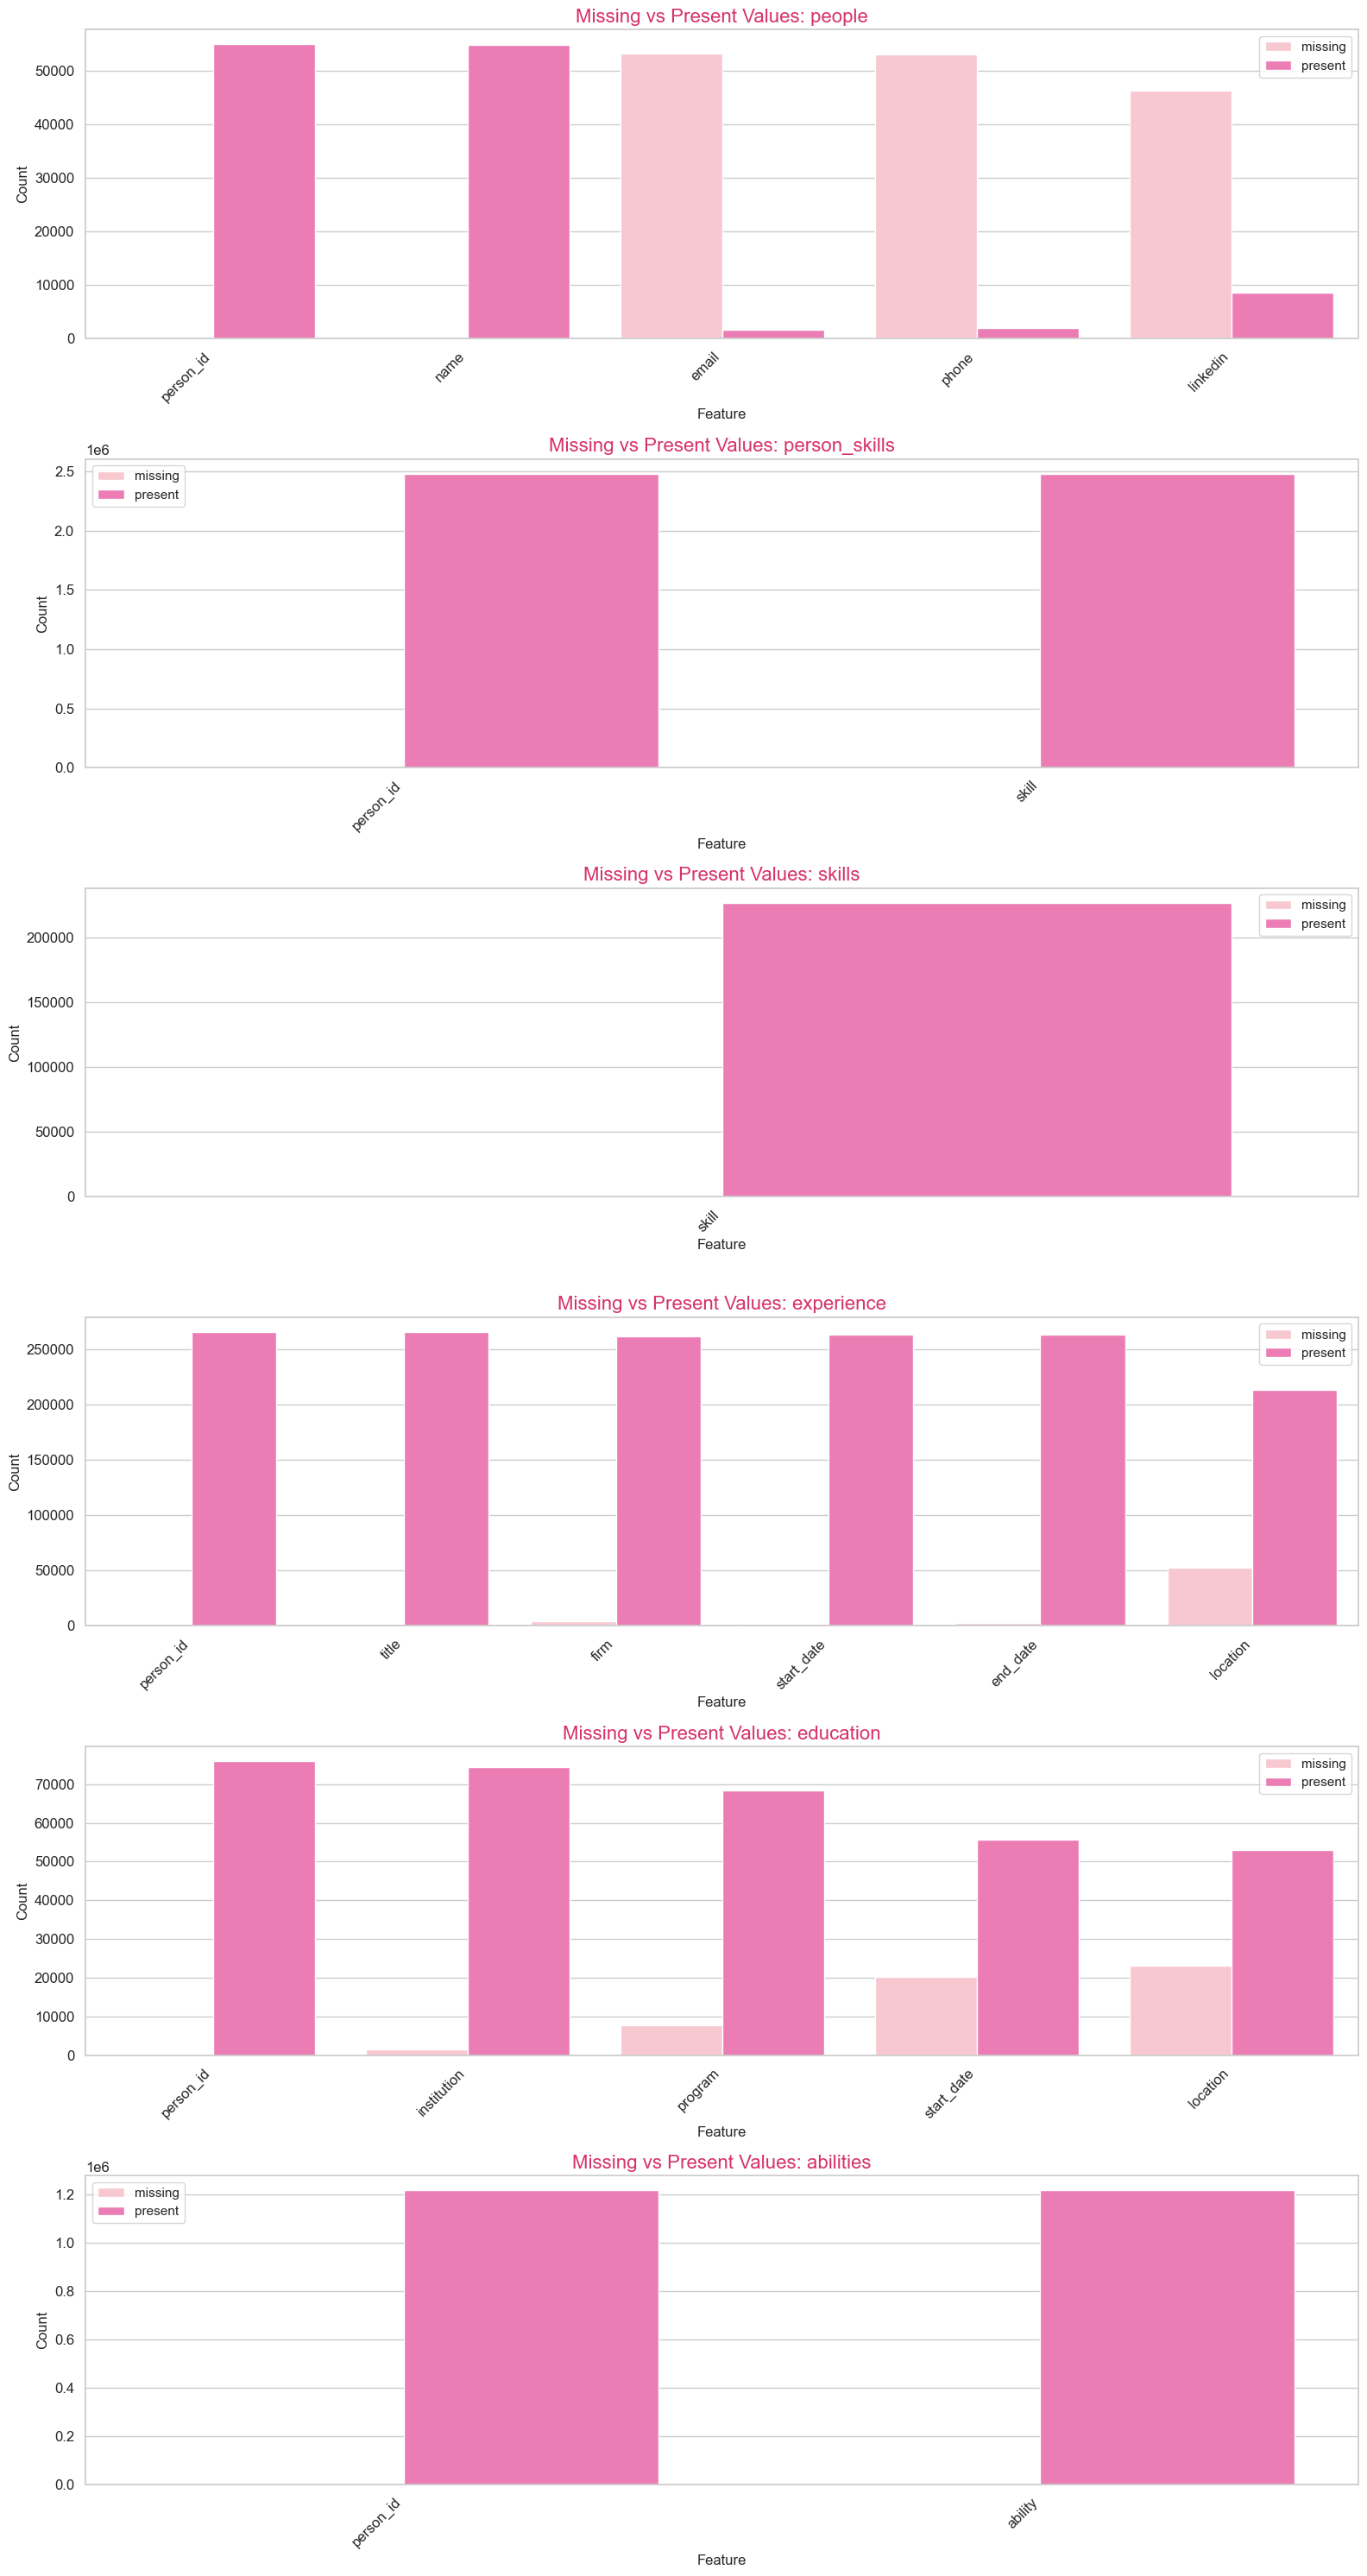

In [43]:
# %% cell: missing_values_dashboard
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 12)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# Prepare colors
color_present = "#ffc0cb"  # soft pink
color_missing = "#ff69b4"  # bright pink

# Number of datasets
n_datasets = len(datasets)
fig, axes = plt.subplots(n_datasets, 1, figsize=(16, 5*n_datasets))

if n_datasets == 1:
    axes = [axes]

for ax, (name, df) in zip(axes, datasets.items()):
    missing_counts = df.isnull().sum()
    present_counts = df.shape[0] - missing_counts
    
    plot_df = pd.DataFrame({
        'feature': missing_counts.index,
        'missing': missing_counts.values,
        'present': present_counts.values
    }).melt(id_vars='feature', value_vars=['missing','present'], var_name='Status', value_name='Count')
    
    sns.barplot(data=plot_df, x='feature', y='Count', hue='Status',
                palette=[color_present, color_missing], ax=ax)
    
    ax.set_title(f"Missing vs Present Values: {name}", color="#d6336c")
    ax.set_ylabel("Count")
    ax.set_xlabel("Feature")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend(title='')

plt.tight_layout()
plt.show()


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/301756846.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/301756846.py:20: UserWarning:


The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/301756846.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/301756846.py:30: UserWarning:


The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.



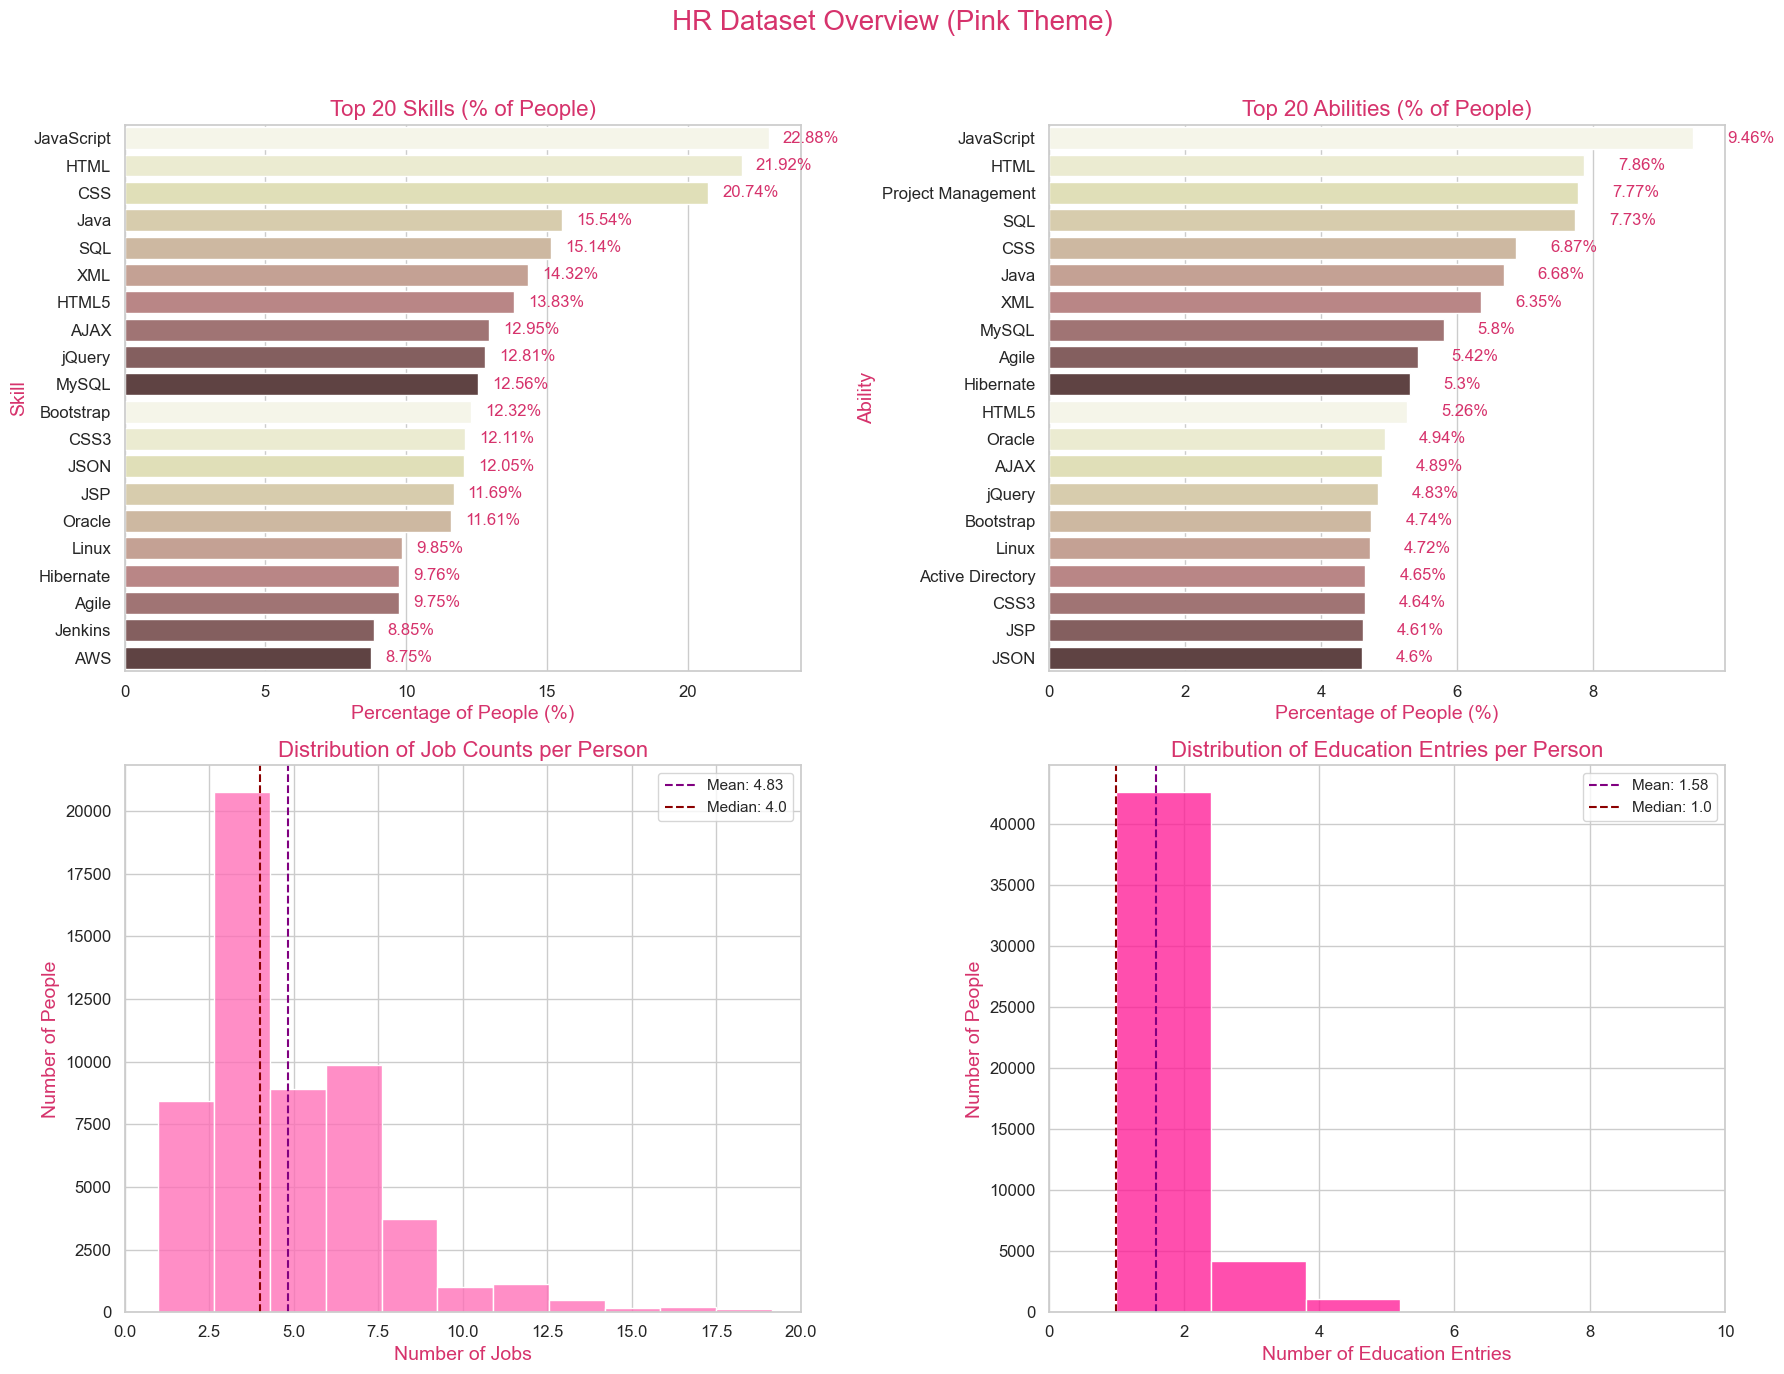

In [46]:
# %% cell: eda_seaborn_pink_dashboard
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pink_palette = sns.color_palette("pink_r", 10)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

total_people = len(people)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle("HR Dataset Overview (Pink Theme)", fontsize=20, color="#d6336c")

# ---------- 1️⃣ Top 20 Skills (% of People) ----------
skill_counts = person_skills.groupby('skill')['person_id'].nunique().sort_values(ascending=False).head(20)
skill_percent = (skill_counts / total_people * 100).round(2)
sns.barplot(x=skill_percent.values, y=skill_percent.index, palette=pink_palette, ax=axes[0,0])
axes[0,0].set_title("Top 20 Skills (% of People)", color="#d6336c")
axes[0,0].set_xlabel("Percentage of People (%)", color="#d6336c")
axes[0,0].set_ylabel("Skill", color="#d6336c")
for i, v in enumerate(skill_percent.values):
    axes[0,0].text(v + 0.5, i, f"{v}%", color="#d6336c", va='center')

# ---------- 2️⃣ Top 20 Abilities (% of People) ----------
ability_counts = abilities.groupby('ability')['person_id'].nunique().sort_values(ascending=False).head(20)
ability_percent = (ability_counts / total_people * 100).round(2)
sns.barplot(x=ability_percent.values, y=ability_percent.index, palette=pink_palette, ax=axes[0,1])
axes[0,1].set_title("Top 20 Abilities (% of People)", color="#d6336c")
axes[0,1].set_xlabel("Percentage of People (%)", color="#d6336c")
axes[0,1].set_ylabel("Ability", color="#d6336c")
for i, v in enumerate(ability_percent.values):
    axes[0,1].text(v + 0.5, i, f"{v}%", color="#d6336c", va='center')

# ---------- 3️⃣ Jobs per Person ----------
jobs_per_person = experience.groupby("person_id").size()
sns.histplot(jobs_per_person, bins=20, kde=False, color="#ff69b4", ax=axes[1,0])
axes[1,0].set_title("Distribution of Job Counts per Person", color="#d6336c")
axes[1,0].set_xlabel("Number of Jobs", color="#d6336c")
axes[1,0].set_ylabel("Number of People", color="#d6336c")
mean_jobs = jobs_per_person.mean()
median_jobs = jobs_per_person.median()
axes[1,0].axvline(mean_jobs, color='purple', linestyle='--', label=f"Mean: {mean_jobs:.2f}")
axes[1,0].axvline(median_jobs, color='darkred', linestyle='--', label=f"Median: {median_jobs}")
axes[1,0].set_xlim(0, 20)
axes[1,0].legend()

# ---------- 4️⃣ Education Entries per Person ----------
edu_per_person = education.groupby("person_id").size()
sns.histplot(edu_per_person, bins=10, kde=False, color="#ff1493", ax=axes[1,1])
axes[1,1].set_title("Distribution of Education Entries per Person", color="#d6336c")
axes[1,1].set_xlabel("Number of Education Entries", color="#d6336c")
axes[1,1].set_ylabel("Number of People", color="#d6336c")
mean_edu = edu_per_person.mean()
median_edu = edu_per_person.median()
axes[1,1].axvline(mean_edu, color='purple', linestyle='--', label=f"Mean: {mean_edu:.2f}")
axes[1,1].axvline(median_edu, color='darkred', linestyle='--', label=f"Median: {median_edu}")
axes[1,1].set_xlim(0, 10)
axes[1,1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/2099288428.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/2099288428.py:38: UserWarning:


The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/2099288428.py:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/2099288428.py:47: UserWarning:


The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.



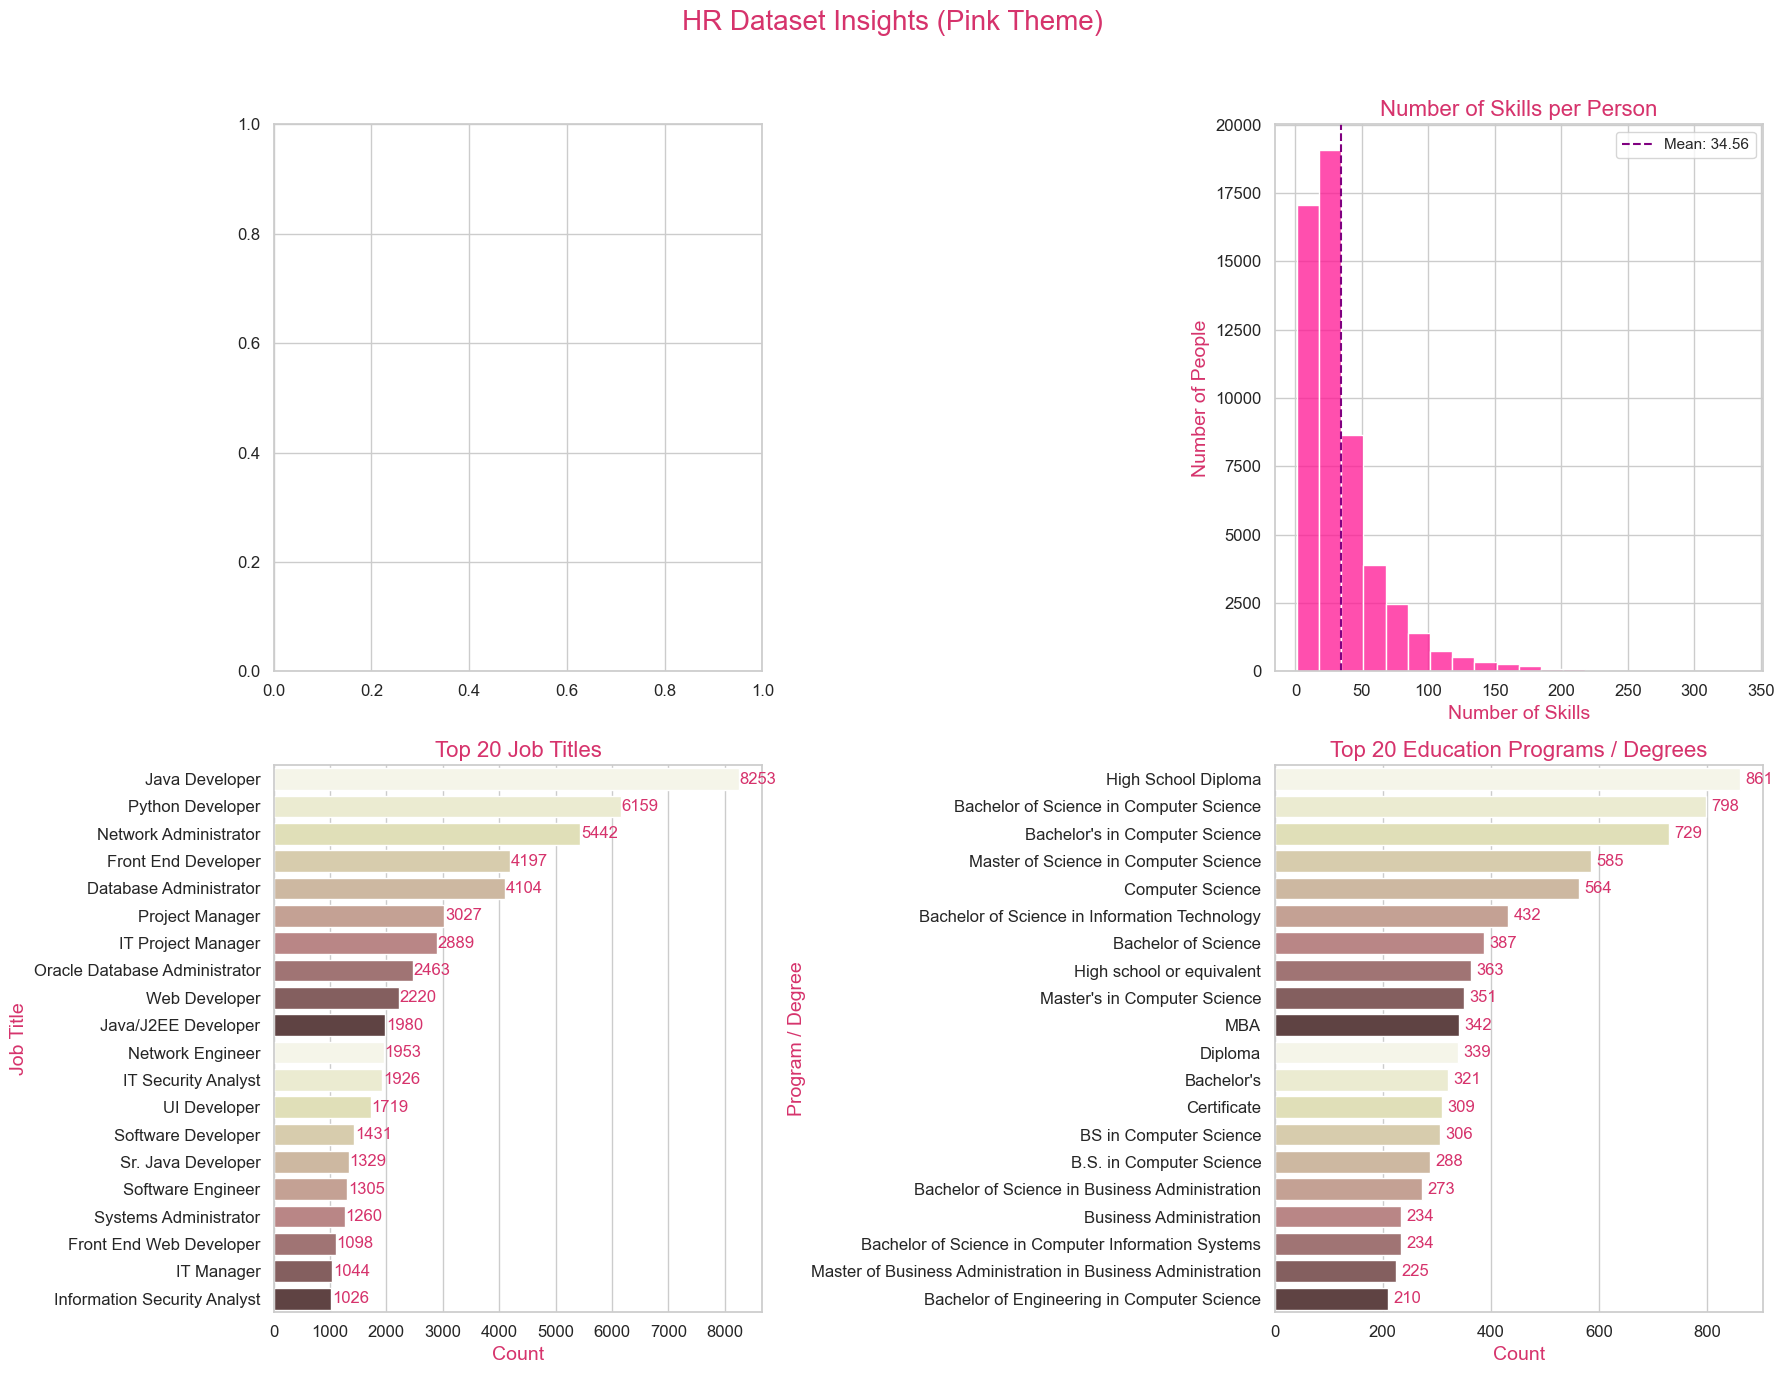

In [ ]:
# %% cell: eda_seaborn_pink_additional
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pink_palette = sns.color_palette("pink_r", 10)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle("HR Dataset Insights (Pink Theme)", fontsize=20, color="#d6336c")

# ---------- 1️⃣ Missing values per column (stacked bar) ----------
datasets_dict = {
    "People": people,
    "Person Skills": person_skills,
    "Experience": experience,
    "Education": education,
    "Abilities": abilities
}

# ---------- 2️⃣ Number of skills per person ----------
skills_per_person = person_skills.groupby("person_id")["skill"].nunique()
sns.histplot(skills_per_person, bins=20, kde=False, color="#ff1493", ax=axes[0,1])
axes[0,1].set_title("Number of Skills per Person", color="#d6336c")
axes[0,1].set_xlabel("Number of Skills", color="#d6336c")
axes[0,1].set_ylabel("Number of People", color="#d6336c")
mean_skills = skills_per_person.mean()
axes[0,1].axvline(mean_skills, color='purple', linestyle='--', label=f"Mean: {mean_skills:.2f}")
axes[0,1].legend()

# ---------- 3️⃣ Top 20 Job Titles ----------
top_titles = experience['title'].value_counts().head(20)
sns.barplot(x=top_titles.values, y=top_titles.index, palette=pink_palette, ax=axes[1,0])
axes[1,0].set_title("Top 20 Job Titles", color="#d6336c")
axes[1,0].set_xlabel("Count", color="#d6336c")
axes[1,0].set_ylabel("Job Title", color="#d6336c")
for i, v in enumerate(top_titles.values):
    axes[1,0].text(v + 10, i, str(v), color="#d6336c", va='center')

# ---------- 4️⃣ Top 20 Education Programs / Degrees ----------
top_programs = education['program'].value_counts().head(20)
sns.barplot(x=top_programs.values, y=top_programs.index, palette=pink_palette, ax=axes[1,1])
axes[1,1].set_title("Top 20 Education Programs / Degrees", color="#d6336c")
axes[1,1].set_xlabel("Count", color="#d6336c")
axes[1,1].set_ylabel("Program / Degree", color="#d6336c")
for i, v in enumerate(top_programs.values):
    axes[1,1].text(v + 10, i, str(v), color="#d6336c", va='center')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


In [51]:
# ---------- Aggregate skills ----------
# Group all skills for each person into a list
skills_per_person = (
    person_skills.groupby("person_id", group_keys=False)['skill']  # group_keys=False avoids including 'person_id' in apply
    .apply(list)
    .reset_index()
)

# ---------- Aggregate abilities ----------
# Group all abilities for each person into a list
abilities_per_person = (
    abilities.groupby("person_id", group_keys=False)['ability']
    .apply(list)
    .reset_index()
)

# ---------- Aggregate experiences ----------
# Convert all experience rows per person into a list of dictionaries
experience_per_person = (
    experience.groupby("person_id", group_keys=False)
    .apply(lambda x: x[['title','firm','start_date','end_date','location']].to_dict(orient='records'))
    .reset_index()
    .rename(columns={0:'experience'})
)

# ---------- Aggregate education ----------
# Convert all education rows per person into a list of dictionaries
education_per_person = (
    education.groupby("person_id", group_keys=False)
    .apply(lambda x: x[['institution','program','start_date','location']].to_dict(orient='records'))
    .reset_index()
    .rename(columns={0:'education'})
)


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/3416718266.py:21: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_3685/3416718266.py:30: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

